# Контрольная работа
Мурпаизов Бабур

In [44]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

Выгрузим данные

In [45]:
df = pd.read_csv('/Users/babur/Downloads/Econometrica-master/python-notebooks/data-csv/californigaHousingPrice.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Видим что колонка ocean_proximity категориальный признак

Заменим значения на 1, 2, 3, 4, 5

In [47]:
cleanup_nums = {"ocean_proximity": {"NEAR BAY": 1, "<1H OCEAN": 2, "INLAND": 3, "NEAR OCEAN": 4, "ISLAND": 5}}
df = df.replace(cleanup_nums)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,1
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,1


Для набора данных 'californigaHousingPrice' рассмотрим регрессию **median_income на log(median_house_value) & log(ocean_proximity).**

Спецификация: $medianincome=\beta_0+\beta_1\log(medianhousevalue)+\beta_2\log(oceanproximity)+u$

Подгоним модель и найдем параметры регрессии

In [48]:
# Подгонка модели
income_eq = smf.ols(formula='median_income~median_house_value+ocean_proximity', data=df).fit()
income_eq.params.round(3)

Intercept             1.425
median_house_value    0.000
ocean_proximity       0.037
dtype: float64

Вычислим основные параметры регрессии: TSS, ESS, RSS

In [49]:
TSS = income_eq.centered_tss
ESS = income_eq.ess
RSS = income_eq.ssr
print("TSS =", TSS.round(3))
print("ESS =", ESS.round(3))
print("RSS =", RSS.round(3))

TSS = 74492.808
ESS = 35287.828
RSS = 39204.981


Вычислим $R^2$ и $R^2_{adj}$

In [50]:
R2 = income_eq.rsquared
R2_adj = income_eq.rsquared_adj
print("R2 =", R2.round(3))
print("R2_adj =", R2_adj.round(3))

R2 = 0.474
R2_adj = 0.474


Вычислим стандартрую ошибку регрессии

In [51]:
n = len(df["median_income"])
k = 2
s = np.sqrt(RSS / (n - k - 1))
print("s =", s.round(3))

s = 1.378


Спецификация: $medianincome=1.425+0*\log(medianhousevalue)+0.037*\log(oceanproximity)+u$

### Интерпретация модели
1) При изменение 𝑚𝑒𝑑𝑖𝑎𝑛ℎ𝑜𝑢𝑠𝑒𝑣𝑎𝑙𝑢𝑒 𝑚𝑒𝑑𝑖𝑎𝑛𝑖𝑛𝑐𝑜𝑚𝑒 не меняется
2) При изменение 𝑜𝑐𝑒𝑎𝑛𝑝𝑟𝑜𝑥𝑖𝑚𝑖𝑡𝑦 𝑚𝑒𝑑𝑖𝑎𝑛𝑖𝑛𝑐𝑜𝑚𝑒 увеличивается на 00.037%

Значимые коэффиценты - **ocean_proximity**

### Построим графики линии тренда для различных наборов значений

<Axes: xlabel='median_income', ylabel='ocean_proximity'>

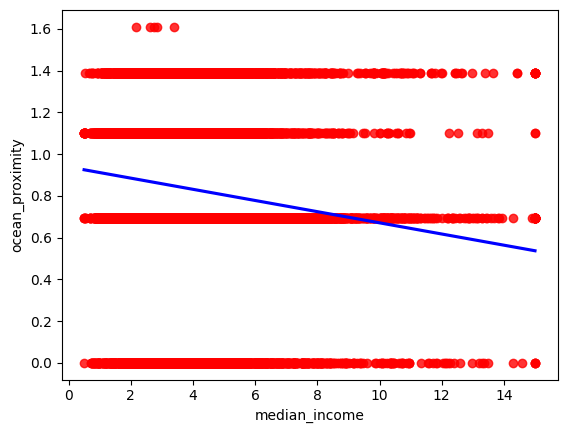

In [52]:
sns.regplot(data=df, x='median_income', y=np.log(df['ocean_proximity']), ci=None, line_kws={"color": "b"}, color = "r")

<Axes: xlabel='median_income', ylabel='median_house_value'>

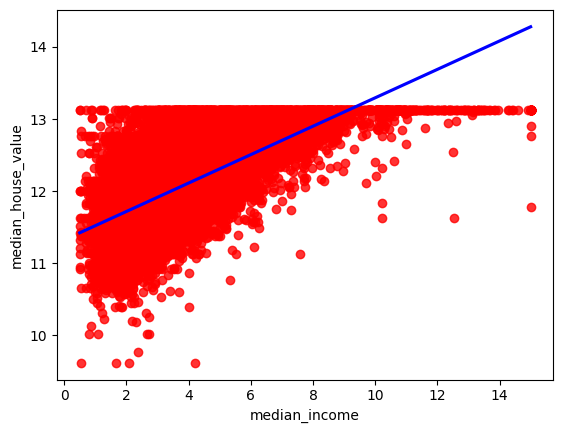

In [53]:
sns.regplot(data=df, x='median_income', y=np.log(df['median_house_value']), ci=None, line_kws={"color": "b"}, color = "r")

Рассмотрим регрессию без константы

In [54]:
income_eq2 = smf.ols(formula='median_income~median_house_value+ocean_proximity', data=df).fit()
income_eq2.params.round(3)

Intercept             1.425
median_house_value    0.000
ocean_proximity       0.037
dtype: float64

Вычислим $R^2$

In [55]:
R2 = income_eq2.rsquared
print("R2 =", R2.round(3))

R2 = 0.474


Сравним с предыдущем значением $R^2$ = 0.474

Видим что значения одинаковые, значит переменная отклика так же объясняется предикторной переменной